In [51]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv("children_game_data.csv")
data.head(5)

,Child#,Game_1,Game_2,Game_3,Game_4,Response_Father,Response_Mother,Child_Type
0,Child 1,5,5,56,2,0,0,Unhealthy
1,Child 2,0,6,13,4,0,0,Unhealthy
2,Child 3,5,4,5,5,0,0,Unhealthy
3,Child 4,4,1,31,6,1,1,Healthy
4,Child 5,1,3,4,2,0,0,Unhealthy


In [52]:
data['Child_Type'].value_counts()

Unhealthy    251
Healthy      249
Name: Child_Type, dtype: int64

In [53]:
# Create a dictionary to map the values
childType_mapping = {"Healthy": 1, "Unhealthy": 0}

# Use the map() function to replace the values in the gender column
data["Child_Type"] = data["Child_Type"].map(childType_mapping)

data['Child_Type'].value_counts()

0    251
1    249
Name: Child_Type, dtype: int64

In [54]:
data.shape

(500, 8)

In [55]:
import sklearn
print("Scikit-Learn version:", sklearn.__version__)

Scikit-Learn version: 1.3.0


In [56]:
null_rows = data.isnull().any(axis=1)  # Check if any value in each row is null
data = data[~(null_rows)]
data.shape

(500, 8)

In [10]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [57]:
data.head(5)

,Child#,Game_1,Game_2,Game_3,Game_4,Response_Father,Response_Mother,Child_Type
0,Child 1,5,5,56,2,0,0,0
1,Child 2,0,6,13,4,0,0,0
2,Child 3,5,4,5,5,0,0,0
3,Child 4,4,1,31,6,1,1,1
4,Child 5,1,3,4,2,0,0,0


In [58]:
from imblearn.over_sampling import SMOTE

X = data.iloc[:,1:7]
y = data['Child_Type']
print(X.isnull().sum())
print(y.isnull().sum())
X.head(2)

Game_1             0
Game_2             0
Game_3             0
Game_4             0
Response_Father    0
Response_Mother    0
dtype: int64
0


,Game_1,Game_2,Game_3,Game_4,Response_Father,Response_Mother
0,5,5,56,2,0,0
1,0,6,13,4,0,0


In [59]:
y.value_counts()
# print(X.head())

0    251
1    249
Name: Child_Type, dtype: int64

In [60]:
# Create an instance of the SMOTE class
smote = SMOTE()

# Resample the dataset
X, y = smote.fit_resample(X, y)
y.value_counts()

0    251
1    251
Name: Child_Type, dtype: int64

In [61]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [62]:
def model_executor_and_acuracy(model):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    print(f"<<<<====== {model} ====>>>>")
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Create a confusion matrix to visualize the performance of the model
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["0", "1"])

    cm_display.plot()
    plt.show()

In [63]:
# Create a logistic regression model
logreg = LogisticRegression()
# Create a KNeighborsClassifier model
knc = KNeighborsClassifier(n_neighbors=2)
# Create a DecisionTreeClassifier model
dtc = DecisionTreeClassifier()
models = [logreg, dtc, knc]

<<<<====== LogisticRegression() ====>>>>
Accuracy: 1.0


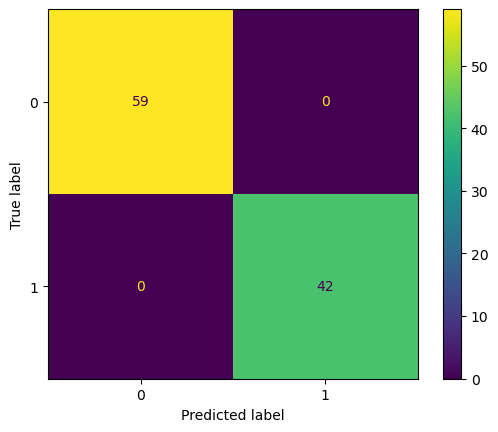

<<<<====== DecisionTreeClassifier() ====>>>>
Accuracy: 1.0


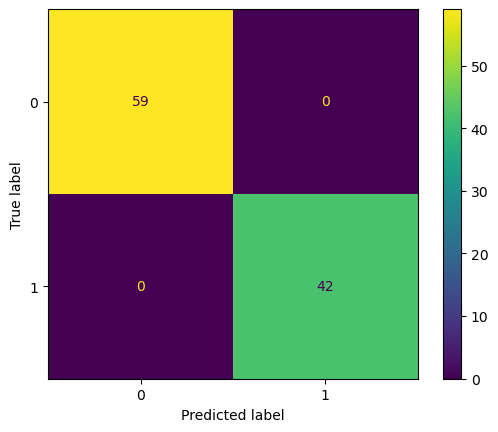

<<<<====== KNeighborsClassifier(n_neighbors=2) ====>>>>
Accuracy: 0.6633663366336634


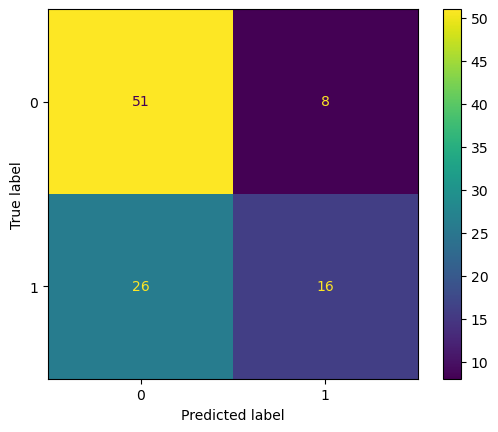

In [64]:
# calling method - model_executor_and_acuracy
for model in models:
    model_executor_and_acuracy(model)

In [69]:
select_model = DecisionTreeClassifier()
select_model.fit(X, y)


DecisionTreeClassifier()

In [70]:
import joblib


# Save the model to a file called "DecisionTreeClassifierModel.joblib".
joblib.dump(select_model, "AnalysisModel.joblib")


['AnalysisModel.joblib']

In [71]:
import joblib

# Load the DecisionTreeClassifierModel from the file "DecisionTreeClassifierModel.joblib".
load_mode = joblib.load("AnalysisModel.joblib")

load_mode

DecisionTreeClassifier()

In [72]:
s2 = [[5],[8], [15],[10],[20], [10],[1],[1]]
print(len(s2))
df = pd.DataFrame({'Game 1': s2[0], 'Game 2': s2[1], 'Game 3': s2[2],'Game 4': s2[3], 'Response for Father': s2[4], 'Response for Mothe': s2[5]})
print(df)


sample = df.iloc[:,:].values 

predict_res = load_mode.predict(sample)
print('load_mode', load_mode)
print('predic', predict_res)


8
   Game 1  Game 2  Game 3  Game 4  Response for Father  Response for Mothe
0       5       8      15      10                   20                  10
load_mode DecisionTreeClassifier()
predic [1]


C:\Users\Malith\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [73]:
if predict_res[0] == 1:
    print("Health")
else :
    print("Unealth")

Health
